In [7]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import  style
style.use('ggplot')
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

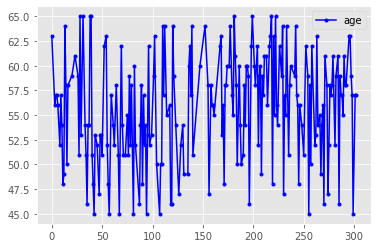

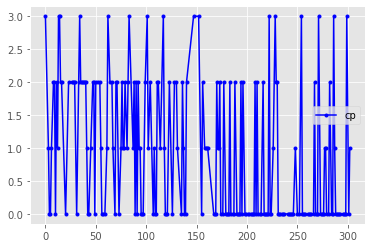

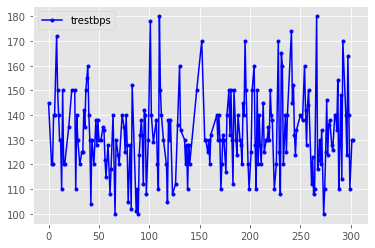

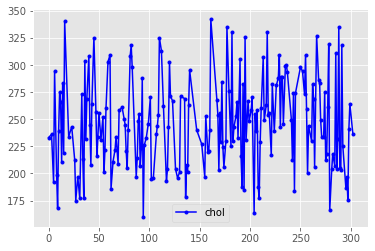

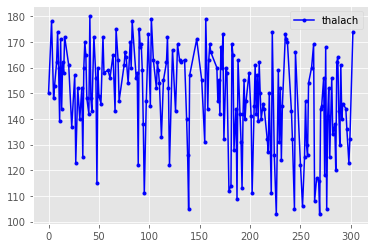

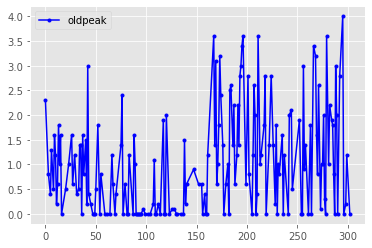

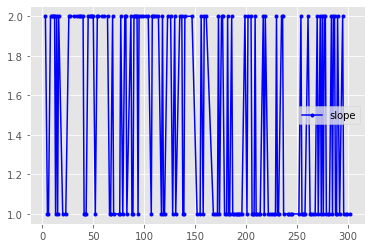

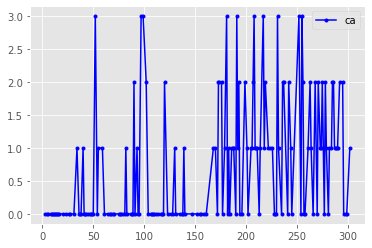

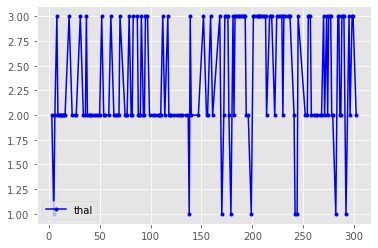

169
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
df=pd.read_csv('/home/aminjs/Downloads/heart.csv')



def outlier_fixing(dff,tar,minN,maxN):
    dff=dff[dff[tar]<=maxN]
    dff=dff[dff[tar]>=minN]
    ax1=plt.subplot(1,1,1)
    dff[tar].plot(label=tar,color="blue",marker='.')
    plt.legend()
    plt.show()
    return dff

 
    
df1=outlier_fixing(df,'age',45,65)
df2=outlier_fixing(df1,'cp',0,3)
df3=outlier_fixing(df2,'trestbps',100,180)
df4=outlier_fixing(df3,'chol',150,350)
df5=outlier_fixing(df4,'thalach',100,180)
df6=(outlier_fixing(df5,'oldpeak',0,4))
df7=(outlier_fixing(df6,'slope',1,2))
df8=outlier_fixing(df7,'ca',0,3)
df9=outlier_fixing(df8,'thal',1,3)
print(len(df9))
print(df.isnull().sum()) #data has no null doc

In [9]:

depp=[]
for i in range(len(df)):
    if(i%2):
        depp.append(1)
    else:
        depp.append(0)

df['depp']=depp
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,depp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1


In [10]:
GAH = df.groupby(['chol','thalach','trestbps'])['target'].count().reset_index().sort_values(by='target',ascending=False)
GAH.head(20).style.background_gradient(cmap='Purples')

,chol,thalach,trestbps,target
15,175,173,138,2
0,126,173,150,1
200,263,105,128,1
206,266,109,124,1
205,265,130,110,1
204,265,122,102,1
203,264,143,130,1
202,264,132,110,1
201,263,173,120,1
199,263,97,130,1


In [11]:
#splitting Data
X = df.drop(['target'] , axis=1).values
Y = df['target'].values
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.20 ,random_state=40 )

In [12]:
#for custom data 
X = df.drop(['target','age','sex','fbs','restecg','oldpeak','slope','ca','thal'],axis=1)
Y = df['target'].values
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.20 ,random_state=40 )


In [13]:

from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()

x_train_scaled = s.fit_transform(x_train)

x_test_scaled = s.transform(x_test)


<ipython-input-15-3341e3ef97e4>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train=pd.Series()
<ipython-input-15-3341e3ef97e4>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test=pd.Series()


([<matplotlib.axis.XTick at 0x7f6e8cadbfd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

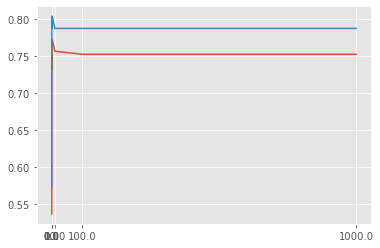

In [15]:
#LogisticRegression
a_index=[0.001 , 0.1 ,0.01 , 1 , 10 , 100 ,1000]
train=pd.Series()
test=pd.Series()
for i in a_index:
    classifier=LogisticRegression(C=i)
    classifier.fit(x_train_scaled,y_train)
    y_pred_LR=classifier.predict(x_test_scaled)
    train=train.append(pd.Series(classifier.score(x_train_scaled,y_train)))
    test=test.append(pd.Series(classifier.score(x_test_scaled,y_test)))
    
plt.plot(a_index, train)
plt.plot(a_index, test)
plt.xticks(a_index)    

In [16]:

gnb = GaussianNB()
gnb.fit(x_train_scaled,y_train)
print(gnb)
GN_train_score = gnb.score(x_train_scaled,y_train)

GN_test_score = gnb.score(x_test_scaled,y_test)
#prediction
y_pred_GN=classifier.predict(x_test_scaled)

GaussianNB()


In [18]:

from sklearn import datasets
from sklearn import metrics

expected = y_train
predicted = gnb.predict(x_train_scaled)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))



              precision    recall  f1-score   support

           0       0.78      0.66      0.71       112
           1       0.74      0.84      0.79       130

    accuracy                           0.76       242
   macro avg       0.76      0.75      0.75       242
weighted avg       0.76      0.76      0.75       242

[[ 74  38]
 [ 21 109]]


In [225]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,depp
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.498350
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.500824
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


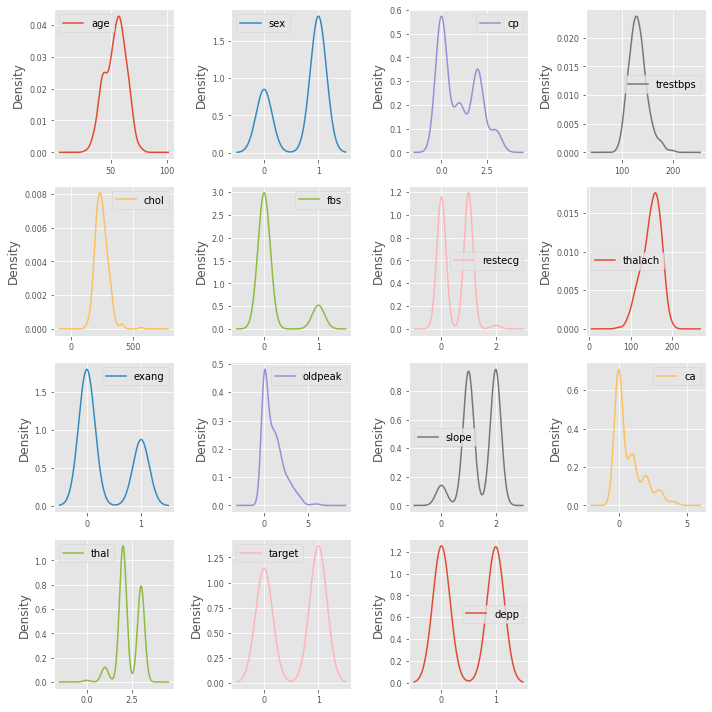

In [226]:
df.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

<ipython-input-227-3341e3ef97e4>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train=pd.Series()
<ipython-input-227-3341e3ef97e4>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test=pd.Series()


([<matplotlib.axis.XTick at 0x7fdf4007db20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

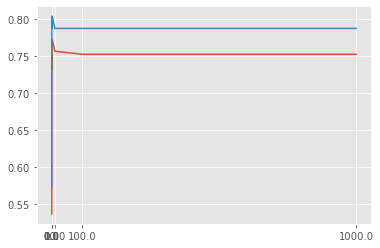

In [21]:
svm = SVC(kernel="rbf")
svm.fit(x_train_scaled,y_train)
y_pred_SVM=svm.predict(x_test_scaled)
#Training Score
Train_Score = svm.score(x_train_scaled,y_train)
#Test Score
test_score = svm.score(x_test_scaled,y_test)
#Conf_Matrix
cm=confusion_matrix(y_pred_SVM,y_test)
print(cm)

[[17  4]
 [ 9 31]]


In [23]:
from sklearn import metrics

expected = y_train
predicted = svm.predict(x_train_scaled)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.83      0.68      0.75       112
           1       0.76      0.88      0.81       130

    accuracy                           0.79       242
   macro avg       0.79      0.78      0.78       242
weighted avg       0.79      0.79      0.78       242

[[ 76  36]
 [ 16 114]]


In [22]:
svm = SVC(kernel="linear")
svm.fit(x_train_scaled,y_train)
y_pred_SVM=svm.predict(x_test_scaled)
#Training Score
Train_Score = svm.score(x_train_scaled,y_train)
#Test Score
test_score = svm.score(x_test_scaled,y_test)
#Conf_Matrix
cm=confusion_matrix(y_pred_SVM,y_test)
print(cm)

[[19  7]
 [ 7 28]]
